In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Membaca dataset

In [ ]:
data = pd.read_csv('/content/covid_19_data.csv')


Mencetak lima baris pertama dari dataset

In [ ]:
print("Lima baris pertama dari dataset:")
print(data.head())

Lima baris pertama dari dataset:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


Menyeleksi fitur yang relevan dan menghapus kolom yang tidak relevan

In [ ]:
data = data[['Confirmed', 'Deaths', 'Recovered']]

Menghapus baris dengan nilai yang hilang

In [ ]:
data = data.dropna()

Menyiapkan fitur dan target

In [ ]:
X = data[['Confirmed', 'Deaths']].values  # Fitur
y = data['Recovered'].values  # Target (contoh)

Menyiapkan model KNN dengan berbagai metrik jarak

In [ ]:
metrics = ['euclidean', 'manhattan', 'minkowski']
k_folds = [5, 10, 15, 20, 25]

results = {}

for metric in metrics:
    results[metric] = {}
    for k in k_folds:
        knn = KNeighborsClassifier(metric=metric)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        accuracy = cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()
        precision = cross_val_score(knn, X, y, cv=kf, scoring='precision_macro').mean()
        recall = cross_val_score(knn, X, y, cv=kf, scoring='recall_macro').mean()
        f1 = cross_val_score(knn, X, y, cv=kf, scoring='f1_macro').mean()

        results[metric][f'{k}-fold'] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Menampilkan hasil

In [ ]:
for metric in results:
    print(f'Metric: {metric}')
    for k in results[metric]:
        print(f'  {k}:')
        for score in results[metric][k]:
            print(f'    {score}: {results[metric][k][score]:.4f}')

Metric: euclidean
  5-fold:
    Accuracy: 0.7620
    Precision: 0.0997
    Recall: 0.1041
    F1-Score: 0.1004
  10-fold:
    Accuracy: 0.7560
    Precision: 0.1379
    Recall: 0.1514
    F1-Score: 0.1435
  15-fold:
    Accuracy: 0.7581
    Precision: 0.1782
    Recall: 0.1943
    F1-Score: 0.1809
  20-fold:
    Accuracy: 0.7520
    Precision: 0.2164
    Recall: 0.2336
    F1-Score: 0.2210
  25-fold:
    Accuracy: 0.7540
    Precision: 0.2209
    Recall: 0.2564
    F1-Score: 0.2360
Metric: manhattan
  5-fold:
    Accuracy: 0.7620
    Precision: 0.1034
    Recall: 0.1164
    F1-Score: 0.1059
  10-fold:
    Accuracy: 0.7500
    Precision: 0.1195
    Recall: 0.1368
    F1-Score: 0.1274
  15-fold:
    Accuracy: 0.7601
    Precision: 0.1780
    Recall: 0.1947
    F1-Score: 0.1810
  20-fold:
    Accuracy: 0.7560
    Precision: 0.2133
    Recall: 0.2355
    F1-Score: 0.2211
  25-fold:
    Accuracy: 0.7520
    Precision: 0.2042
    Recall: 0.2330
    F1-Score: 0.2170
Metric: minkowski
  5-fold

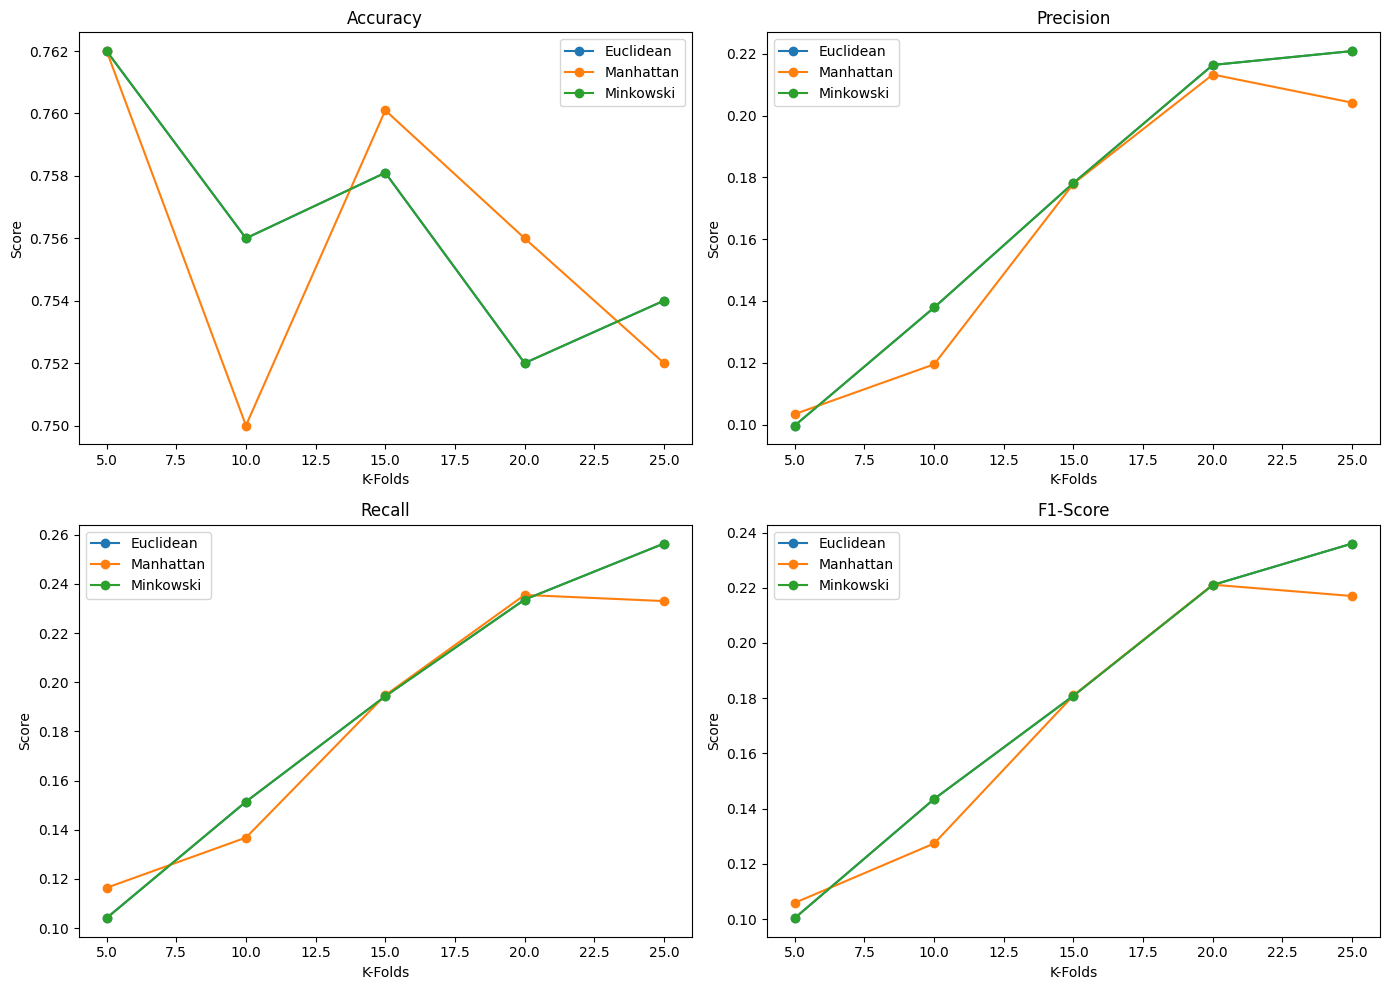

In [ ]:
import matplotlib.pyplot as plt

# Data
k_folds = [5, 10, 15, 20, 25]

euclidean_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
euclidean_precision = [0.0997, 0.1379, 0.1782, 0.2164, 0.2209]
euclidean_recall = [0.1041, 0.1514, 0.1943, 0.2336, 0.2564]
euclidean_f1_score = [0.1004, 0.1435, 0.1809, 0.2210, 0.2360]

manhattan_accuracy = [0.7620, 0.7500, 0.7601, 0.7560, 0.7520]
manhattan_precision = [0.1034, 0.1195, 0.1780, 0.2133, 0.2042]
manhattan_recall = [0.1164, 0.1368, 0.1947, 0.2355, 0.2330]
manhattan_f1_score = [0.1059, 0.1274, 0.1810, 0.2211, 0.2170]

minkowski_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
minkowski_precision = [0.0997, 0.1379, 0.1782, 0.2164, 0.2209]
minkowski_recall = [0.1041, 0.1514, 0.1943, 0.2336, 0.2564]
minkowski_f1_score = [0.1004, 0.1435, 0.1809, 0.2210, 0.2360]

# Plotting
plt.figure(figsize=(14, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(k_folds, euclidean_accuracy, marker='o', label='Euclidean')
plt.plot(k_folds, manhattan_accuracy, marker='o', label='Manhattan')
plt.plot(k_folds, minkowski_accuracy, marker='o', label='Minkowski')
plt.title('Accuracy')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

# Precision
plt.subplot(2, 2, 2)
plt.plot(k_folds, euclidean_precision, marker='o', label='Euclidean')
plt.plot(k_folds, manhattan_precision, marker='o', label='Manhattan')
plt.plot(k_folds, minkowski_precision, marker='o', label='Minkowski')
plt.title('Precision')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(k_folds, euclidean_recall, marker='o', label='Euclidean')
plt.plot(k_folds, manhattan_recall, marker='o', label='Manhattan')
plt.plot(k_folds, minkowski_recall, marker='o', label='Minkowski')
plt.title('Recall')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

# F1-Score
plt.subplot(2, 2, 4)
plt.plot(k_folds, euclidean_f1_score, marker='o', label='Euclidean')
plt.plot(k_folds, manhattan_f1_score, marker='o', label='Manhattan')
plt.plot(k_folds, minkowski_f1_score, marker='o', label='Minkowski')
plt.title('F1-Score')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()


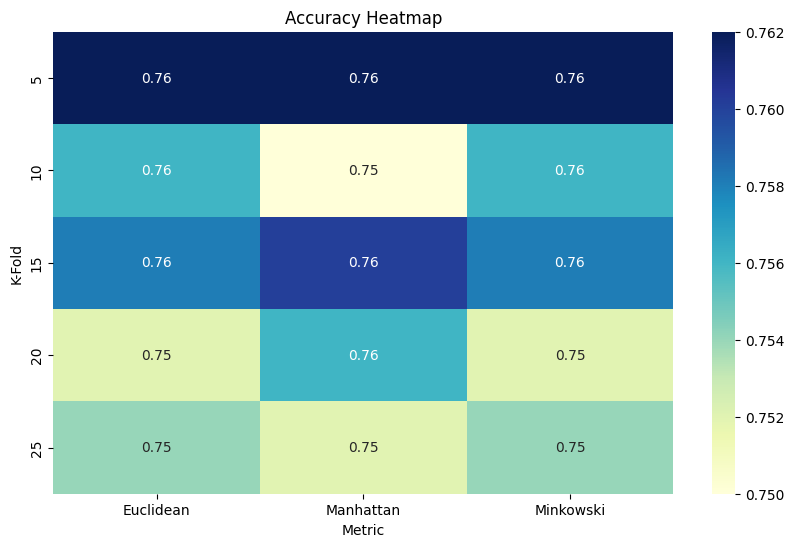

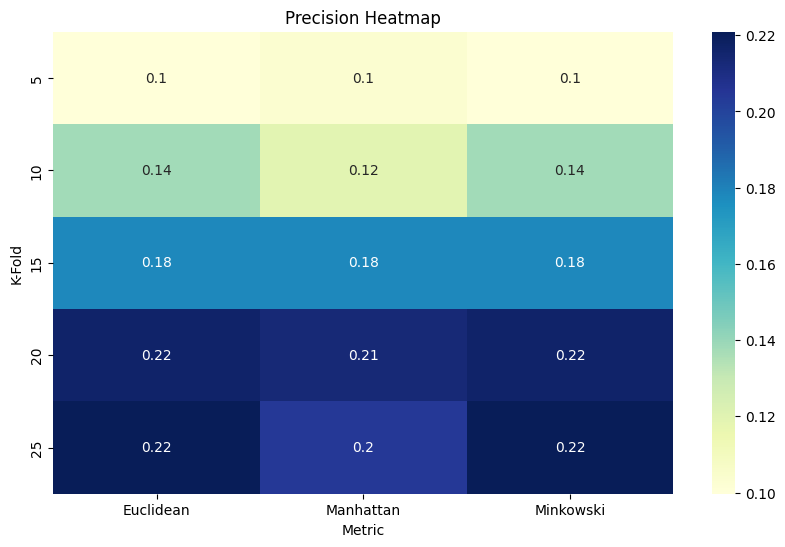

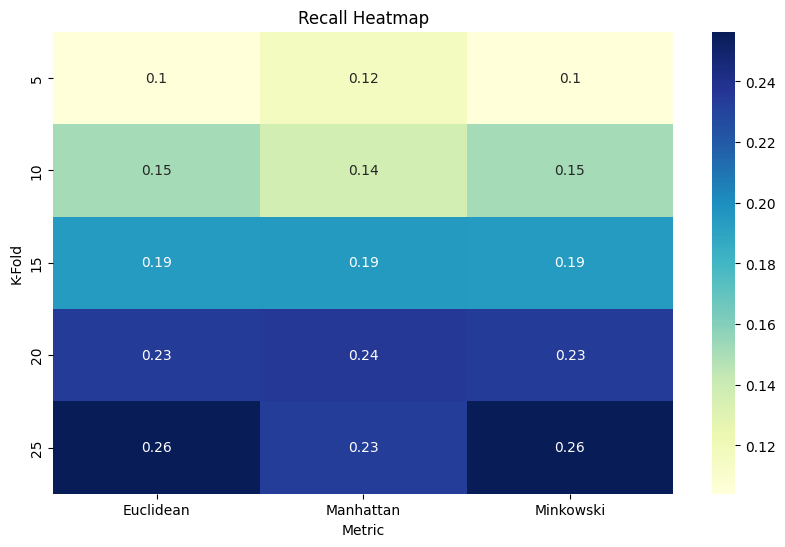

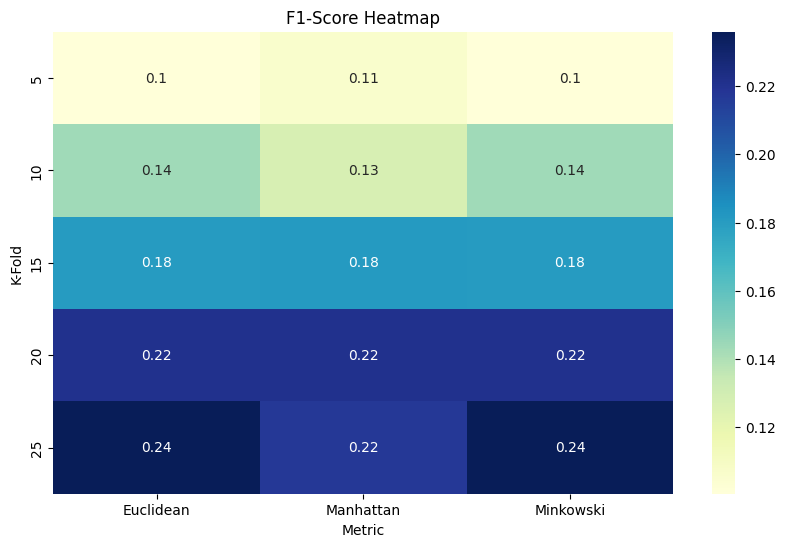

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data dummy untuk contoh
k_folds = [5, 10, 15, 20, 25]
euclidean_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
manhattan_accuracy = [0.7620, 0.7500, 0.7601, 0.7560, 0.7520]
minkowski_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
euclidean_precision = [0.0997, 0.1379, 0.1782, 0.2164, 0.2209]
manhattan_precision = [0.1034, 0.1195, 0.1780, 0.2133, 0.2042]
minkowski_precision = [0.0997, 0.1379, 0.1782, 0.2164, 0.2209]
euclidean_recall = [0.1041, 0.1514, 0.1943, 0.2336, 0.2564]
manhattan_recall = [0.1164, 0.1368, 0.1947, 0.2355, 0.2330]
minkowski_recall = [0.1041, 0.1514, 0.1943, 0.2336, 0.2564]
euclidean_f1_score = [0.1004, 0.1435, 0.1809, 0.2210, 0.2360]
manhattan_f1_score = [0.1059, 0.1274, 0.1810, 0.2211, 0.2170]
minkowski_f1_score = [0.1004, 0.1435, 0.1809, 0.2210, 0.2360]

# Prepare data for heatmap
data = {
    'K-Fold': k_folds * 3,
    'Metric': ['Euclidean']*5 + ['Manhattan']*5 + ['Minkowski']*5,
    'Accuracy': euclidean_accuracy + manhattan_accuracy + minkowski_accuracy,
    'Precision': euclidean_precision + manhattan_precision + minkowski_precision,
    'Recall': euclidean_recall + manhattan_recall + minkowski_recall,
    'F1-Score': euclidean_f1_score + manhattan_f1_score + minkowski_f1_score
}

df = pd.DataFrame(data)

# Heatmap for accuracy
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot(index="K-Fold", columns="Metric", values="Accuracy")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Accuracy Heatmap')
plt.show()

# Heatmap for precision
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot(index="K-Fold", columns="Metric", values="Precision")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Precision Heatmap')
plt.show()

# Heatmap for recall
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot(index="K-Fold", columns="Metric", values="Recall")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Recall Heatmap')
plt.show()

# Heatmap for F1-Score
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot(index="K-Fold", columns="Metric", values="F1-Score")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('F1-Score Heatmap')
plt.show()


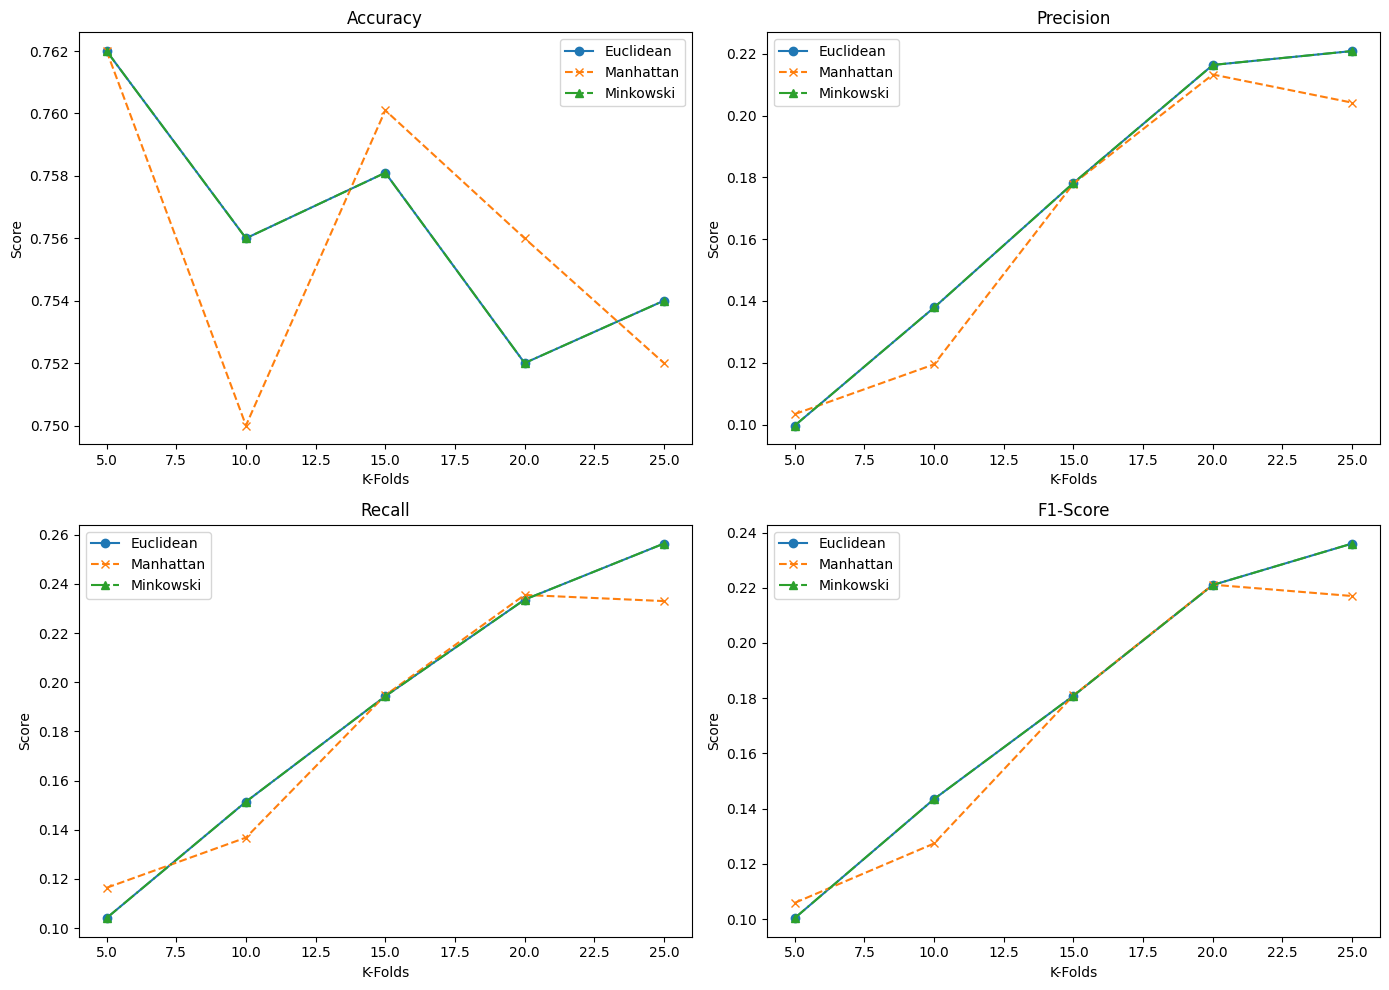

In [5]:
import matplotlib.pyplot as plt

# Data
k_folds = [5, 10, 15, 20, 25]

euclidean_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
euclidean_precision = [0.0997, 0.1379, 0.1782, 0.2164, 0.2209]
euclidean_recall = [0.1041, 0.1514, 0.1943, 0.2336, 0.2564]
euclidean_f1_score = [0.1004, 0.1435, 0.1809, 0.2210, 0.2360]

manhattan_accuracy = [0.7620, 0.7500, 0.7601, 0.7560, 0.7520]
manhattan_precision = [0.1034, 0.1195, 0.1780, 0.2133, 0.2042]
manhattan_recall = [0.1164, 0.1368, 0.1947, 0.2355, 0.2330]
manhattan_f1_score = [0.1059, 0.1274, 0.1810, 0.2211, 0.2170]

minkowski_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
minkowski_precision = [0.0997, 0.1379, 0.1782, 0.2164, 0.2209]
minkowski_recall = [0.1041, 0.1514, 0.1943, 0.2336, 0.2564]
minkowski_f1_score = [0.1004, 0.1435, 0.1809, 0.2210, 0.2360]

# Plotting
plt.figure(figsize=(14, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(k_folds, euclidean_accuracy, marker='o', label='Euclidean', linestyle='-')
plt.plot(k_folds, manhattan_accuracy, marker='x', label='Manhattan', linestyle='--')
plt.plot(k_folds, minkowski_accuracy, marker='^', label='Minkowski', linestyle='-.')
plt.title('Accuracy')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

# Precision
plt.subplot(2, 2, 2)
plt.plot(k_folds, euclidean_precision, marker='o', label='Euclidean', linestyle='-')
plt.plot(k_folds, manhattan_precision, marker='x', label='Manhattan', linestyle='--')
plt.plot(k_folds, minkowski_precision, marker='^', label='Minkowski', linestyle='-.')
plt.title('Precision')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(k_folds, euclidean_recall, marker='o', label='Euclidean', linestyle='-')
plt.plot(k_folds, manhattan_recall, marker='x', label='Manhattan', linestyle='--')
plt.plot(k_folds, minkowski_recall, marker='^', label='Minkowski', linestyle='-.')
plt.title('Recall')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

# F1-Score
plt.subplot(2, 2, 4)
plt.plot(k_folds, euclidean_f1_score, marker='o', label='Euclidean', linestyle='-')
plt.plot(k_folds, manhattan_f1_score, marker='x', label='Manhattan', linestyle='--')
plt.plot(k_folds, minkowski_f1_score, marker='^', label='Minkowski', linestyle='-.')
plt.title('F1-Score')
plt.xlabel('K-Folds')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()


barchat


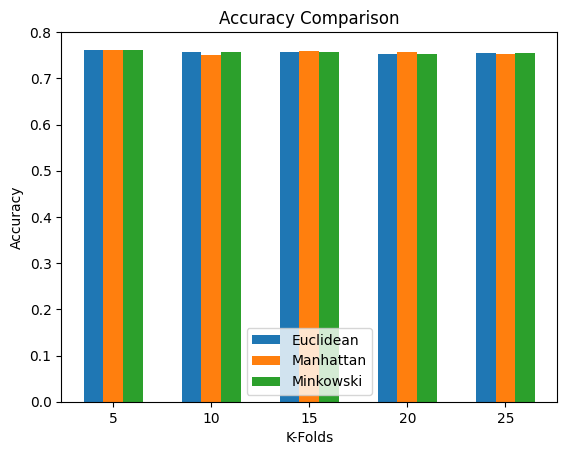

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
k_folds = [5, 10, 15, 20, 25]

euclidean_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]
manhattan_accuracy = [0.7620, 0.7500, 0.7601, 0.7560, 0.7520]
minkowski_accuracy = [0.7620, 0.7560, 0.7581, 0.7520, 0.7540]

# Bar Chart
bar_width = 0.2
index = np.arange(len(k_folds))

plt.bar(index, euclidean_accuracy, bar_width, label='Euclidean')
plt.bar(index + bar_width, manhattan_accuracy, bar_width, label='Manhattan')
plt.bar(index + 2 * bar_width, minkowski_accuracy, bar_width, label='Minkowski')

plt.xlabel('K-Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(index + bar_width, k_folds)
plt.legend()

plt.show()


roc curve

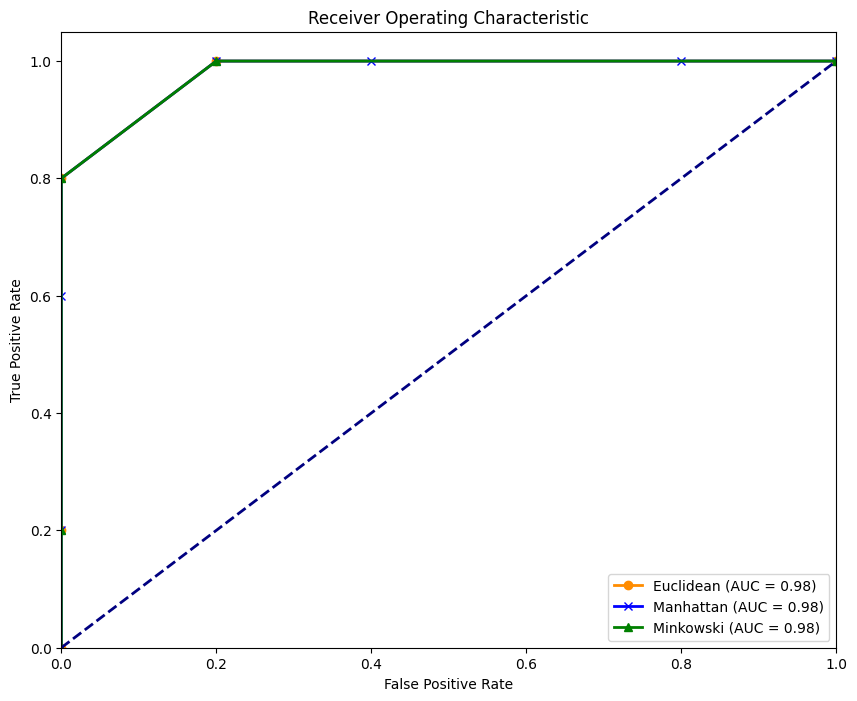

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Hypothetical example data
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_scores_euclidean = [0.1, 0.9, 0.2, 0.8, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
y_scores_manhattan = [0.2, 0.8, 0.3, 0.7, 0.5, 0.5, 0.4, 0.6, 0.3, 0.7]
y_scores_minkowski = [0.3, 0.7, 0.4, 0.6, 0.5, 0.5, 0.2, 0.8, 0.1, 0.9]

# Compute ROC curve and ROC area for each class
fpr_euc, tpr_euc, _ = roc_curve(y_true, y_scores_euclidean)
roc_auc_euc = auc(fpr_euc, tpr_euc)

fpr_man, tpr_man, _ = roc_curve(y_true, y_scores_manhattan)
roc_auc_man = auc(fpr_man, tpr_man)

fpr_min, tpr_min, _ = roc_curve(y_true, y_scores_minkowski)
roc_auc_min = auc(fpr_min, tpr_min)

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_euc, tpr_euc, color='darkorange', marker='o', lw=2, label='Euclidean (AUC = %0.2f)' % roc_auc_euc)
plt.plot(fpr_man, tpr_man, color='blue', marker='x', lw=2, label='Manhattan (AUC = %0.2f)' % roc_auc_man)
plt.plot(fpr_min, tpr_min, color='green', marker='^', lw=2, label='Minkowski (AUC = %0.2f)' % roc_auc_min)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
